In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [2]:
import os

In [3]:
os.chdir("D://Business analytics//Excel class//Python")

In [4]:
car_data = pd.read_csv("car_data.csv")
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#encoding columns so that we can use the value effeciently for machine learning model
car_data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
car_data.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)
car_data.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

In [7]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [8]:
car_data = car_data.drop(columns=["Car_Name"],axis=1)

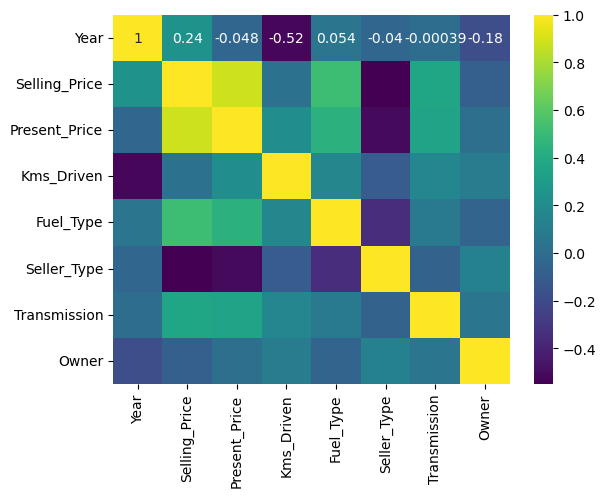

In [9]:
corrMatrix = car_data.corr() 
sns.heatmap(corrMatrix, annot=True, cmap="viridis") 
plt.show()

Model Accuracy

In [10]:
Y= car_data["Selling_Price"]
X = car_data.drop("Selling_Price",axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [11]:
#line regression model
lin_reg_model = LinearRegression() 
#Now we can fit the model to our dataset 
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [12]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [13]:
# R squared Error 
train_error_score = metrics.r2_score(Y_train, training_data_prediction) 
print("R squared Error - Training : ", train_error_score)

R squared Error - Training :  0.8839793496750804


In [14]:
Y_pred = lin_reg_model.predict(X_train)
Y_pred

array([-2.43062350e+00,  1.97313550e+00, -1.62540293e+00,  4.81053869e+00,
        1.82305182e+00,  2.02086463e+01,  1.82240444e+01,  5.48531996e+00,
       -6.71214304e-01,  4.59840910e+00,  5.44828488e+00,  5.69872459e+00,
        4.99252344e+00,  2.74420426e+00,  1.63527084e+00,  1.91654107e+00,
        1.00884173e+01,  7.96510373e-01,  7.87989022e+00,  4.53232619e+00,
        3.37568227e+00,  4.54704954e+00,  1.45039687e+01,  2.29271781e+00,
        3.08198504e+00,  9.26202422e-01,  3.48180495e+00,  1.14851619e+00,
        1.68652847e+01,  1.40085330e+00,  1.82947265e-01,  9.16966400e+00,
        8.21516023e+00,  4.31511433e+00, -2.56664991e+00,  4.19262833e+00,
        6.12495501e+00,  4.38850144e+00, -3.20765492e+00,  7.85876515e+00,
       -7.83443958e-01,  6.71120803e+00,  3.85312890e+00,  1.01957928e+01,
        2.46188866e+00,  1.15129608e+01,  2.41625540e+00, -3.09486511e-01,
        1.20681624e-01,  5.67944212e+00,  1.44357486e+00,  6.70876867e+00,
        2.11796846e-01,  

In [15]:

train_error_score = metrics.r2_score(Y_train, Y_pred) 
print("R squared Error - Training : ", train_error_score)

R squared Error - Training :  0.8839793496750804


In [16]:
Y_pred2 = lin_reg_model.predict(X_test) 
# R squared Error 
test_error_score = metrics.r2_score(Y_test, Y_pred2) 
print("R squared Error - Test: ", test_error_score)

R squared Error - Test:  0.8468053957656777


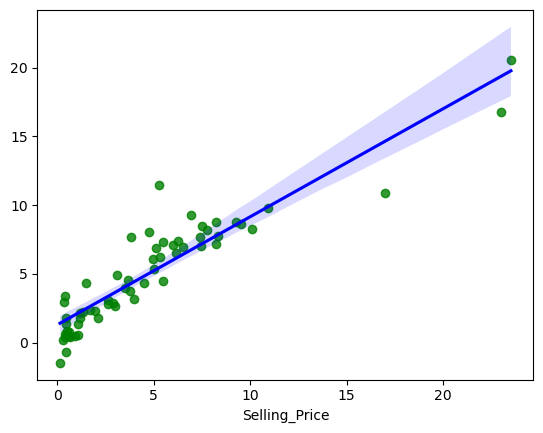

In [19]:
# create scatterplot with regression line 
sns.regplot(x=Y_test,y= Y_pred2, scatter_kws={"color": "green"}, line_kws={"color": "blue"})
plt.show()